In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2

Using TensorFlow backend.


In [0]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [0]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [0]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,1
1,2,DSCF0900.JPG,800,specialty,1
2,3,DSCF0904.JPG,1250,specialty,1
3,4,DSCF0905.JPG,400,specialty,1
4,5,DSCF0910.JPG,800,specialty,1
...,...,...,...,...,...
535,536,DSCF1724.JPG,800,exchange,3
536,537,DSCF1725.JPG,1250,exchange,3
537,538,DSCF1726.JPG,400,exchange,3
538,539,DSCF1727.JPG,800,exchange,3


In [0]:
width = 1920#530#265
height = 1024#298#149

In [0]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  image_list.append(img)

label = dtLabel['label']

In [0]:
# label = np.concatenate((label), axis=0)
# label

In [0]:
Y = label

In [0]:
len(label)

540

In [0]:
np.array(image_list[20])

In [0]:
np.array(image_list[1]).shape

(1024, 1920, 3)

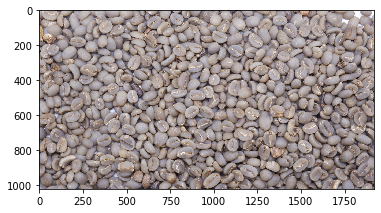

In [0]:
from IPython.display import Image as Img

plt.imshow(image_list[10])
print('')



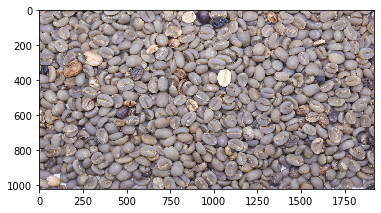

In [0]:
plt.imshow(image_list[300])
print('')

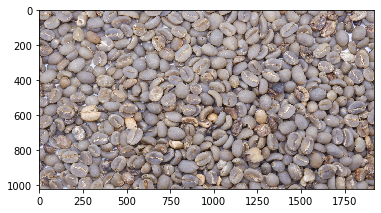

In [0]:
plt.imshow(image_list[400])
#print('')

In [0]:
img_gray = image_list
len(img_gray)

540

In [0]:
img_gray

In [0]:
np.array(img_gray[2]).shape

(1024, 1920, 3)

In [0]:
grayscalling = []

for grey2 in range(0,len(img_gray)):
  grayscalling.append(cv2.cvtColor(np.array(img_gray[grey2]), cv2.COLOR_BGR2GRAY))

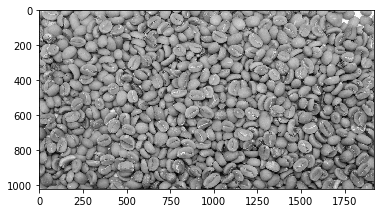

In [0]:
plt.imshow(grayscalling[10], cmap='gray')

# Feature Extraction, Local Binary Pattern

In [0]:
#nnti coba dlu pake satu gambar atau satu indeks ajah dlu

def getLBPimage(grayscalling, image_list):
  
  #input gray image = color image of shape(height, width)

  #output img: LBP converted image of the same shape as

  #step 0: step 0, Convert image to grayscall but already done
  #using the grayscalling = [] before the LBP

  imgLBP = np.zeros_like(grayscalling)
  neighboor = 3

  image_list = np.array(image_list)
  
  #kalau img_gray gak bisa coba pakek image_list
  for imgHeight in range(0,image_list.shape[0] - neighboor):
    for imgWidth in range(0,image_list.shape[1] - neighboor):

      # Step1: 3 by 3 pixel
      img           = grayscalling[imgHeight:imgHeight+neighboor, imgWidth:imgWidth+neighboor]
      center        = img[1,1]
      img01         = (img >= center)*1.0
      img01_vector  = img01.T.flatten() #make array become flat in one line (vector)

      # it is ok to order counterclock manner
      # img01_vector = img01.flatten()

      # Step 2: *Binary Operation
      img01_vector = np.delete(img01_vector,4)

      # Step 3 : Decimal: Convert the binary operated values to a digit
      where_img01_vector = np.where(img01_vector)[0]
      if len(where_img01_vector) >= 1:
        num = np.sum(2**where_img01_vector)
      else:
        num = 0
      imgLBP[imgHeight+1, imgWidth+1] = num
  
  return(imgLBP)



In [0]:
lbp = getLBPimage(grayscalling[10], image_list[10])

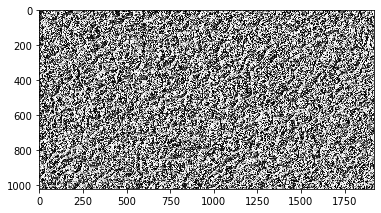

In [0]:
plt.imshow(lbp, cmap='gray')

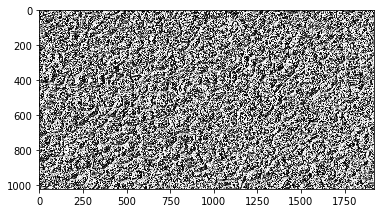

In [0]:
lbp = getLBPimage(grayscalling[300], image_list[300])
plt.imshow(lbp, cmap='gray')

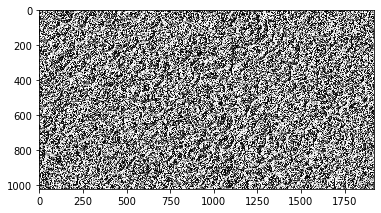

In [0]:
lbp = getLBPimage(grayscalling[400], image_list[400])
plt.imshow(lbp, cmap='gray')